# LifeCycle fo Data Science Project

## 1. Defining the problem statement

 **1.1 Hypothesisi Generation**
 
 **1.2 Collecting the data**
    
## 2. Data Exporation
   
   **2.1 Univariant Analysis**
   
   **2.2 Multivariant Analysis**
   
   **2.3 Data Preprocessing**
      
## 3. Feature Engineering

## 4. Feature Transformations
  
**4.1 Categorical Variables — One Hot Encoding**

**4.2. Exporting Data**

## 5. Modelling

**5.1. Linear Regression Model**

**5.2. Ridge Regression Model**

**5.3. Decision Tree Model**


**5.4. Random Forrest Model**

**5.5. XGBoost Model**


## 6. Testing

## 7. Deployment


![Image of Yaktocat](http://3.bp.blogspot.com/-itB7-AuweWg/UPKRV-7BZsI/AAAAAAAAADk/nwUBL3dan9Q/s1600/big_mart_20110325093847.jpg)

## 1. Defining the problem statement :

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. ***The aim is to build a predictive model and find out the sales of each product at a particular store***. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### 1.1 Collecting the data:

     Training data set and testing data can download from my github.
https://github.com/vishalbule/Practical-Data-Science-Big-Mart-Sales-Prediction/blob/master/BigMart_Sales_Data_Test.csv
https://github.com/vishalbule/Practical-Data-Science-Big-Mart-Sales-Prediction/blob/master/BigMart_Sales_Data_Train.csv
        

### 1.2 Hypothesisi Generation :

     Understanding the problem better by brainstorming possible factors that can impact the outcome.

### Store Level Hypotheses :
**City type**: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.

**Population Density** : Stores located in densely populated areas should have higher sales because of more demand.

**Store Capacity**: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place

**Competitors :** Stores having similar establishments nearby should have less sales because of more competition.

**Marketing** : Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.

**Location** : Stores located within popular marketplaces should have higher sales because of better access to customers.

**Customer Behavio**r : Stores keeping the right set of products to meet the local needs of customers will have higher sales.

**Ambiance** : Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

### Product Level Hypotheses :

**Brand** : Branded products should have higher sales because of higher trust in the customer.

**Packaging** : Products with good packaging can attract customers and sell more.

**Utilit**y : Daily use products should have a higher tendency to sell as compared to the specific use products.

**Display Area** : Products which are given bigger shelves in the store are likely to catch attention first and sell more.

**Visibility in Store** : The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

**Advertising** : Better advertising of products in the store will should higher sales in most cases.

**Promotional Offer**s : Products accompanied with attractive offers and discounts will sell more.


**Available data**

This dataset contains 8523 observations and 12 features.

![Image of Yaktocat](https://drive.google.com/uc?id=18caAHtaY8olrILAMEvX_HOm73ATVPTUQ)

![Image of Yaktocat](https://drive.google.com/uc?id=1dgA5o6AH8gSG1eBo1CbvfyB_KQKsaeTz) 

In [213]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pylab as plot
import warnings
import pandas as pd
import io
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [214]:
# Download the training file from github and save into local system to upload in colab to further process 
#uploaded = files.upload()
train = pd.read_csv("/Users/vishal.bule/Desktop/Practical-Data-Science-master/BigMart_Sales_Data_Train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [215]:
# Download the Test file from github and save into local system to upload in colab to further process 
test = pd.read_csv("/Users/vishal.bule/Desktop/Practical-Data-Science-master/BigMart_Sales_Data_Test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [216]:
#Check for duplicates
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6964 duplicate IDs for 8523 total entries


## 2. Data Exporation :

      Remember the quality of your inputs decide the quality of your output. So, once you have got your business 
      hypothesis ready,it makes sense to spend lot of time and efforts here. With my personal estimate, data 
      exploration,cleaning and preparation can take up to 70% of your total project time.
 ### 2.1. Univariate Analysis
       To get an idea of the distribution of numerical variables, histograms are an excellent starting point.
       Let’s begin by generating one for Item_Outlet_Sales, our target variable
  #### 2.1.1. Distribution of the target variable: Item_Outlet_Sales

Skew is: 1.1775306028542798
Kurtosis: 1.615877


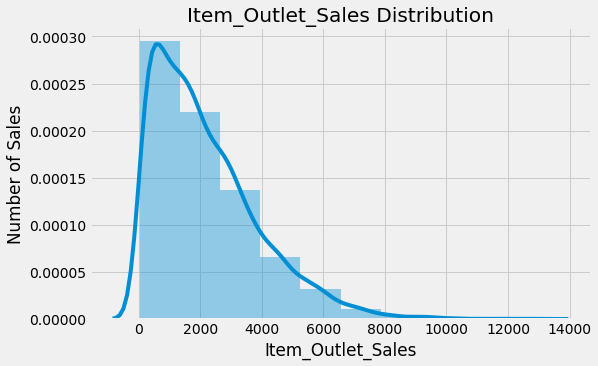

In [217]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.distplot(train.Item_Outlet_Sales, bins = 10)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

### 2.1.2. Numerical Predictors
    we’ve analysed our target variable, let’s consider our predictors. Let’s start by seeing which of our features are numeric.

In [218]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

#### 2.1.2.1. Correlation between Numerical Predictors and Target variable

In [219]:
corr =numeric_features.corr()
corr
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


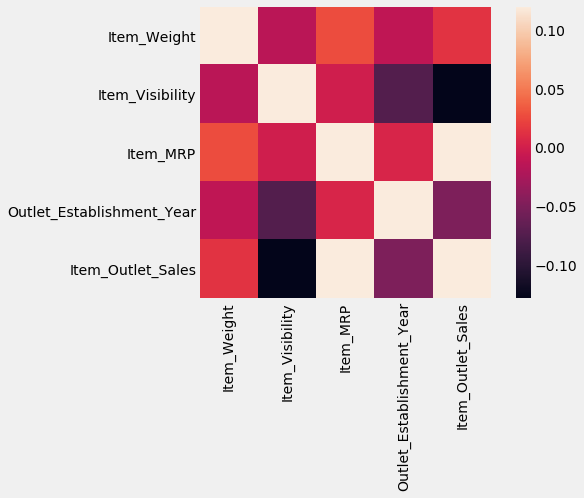

In [220]:
#correlation matrix
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, vmax=.12, square=True);

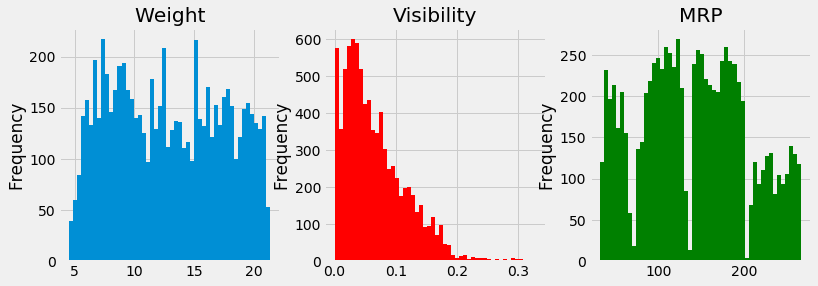

In [221]:
plt.figure(1)
plt.subplot(131)
train.Item_Weight.plot(kind='hist',bins=50,figsize=(12,4),title='Weight')
plt.subplot(132)
train.Item_Visibility.plot(kind='hist',bins=50,title='Visibility',color='r')
plt.subplot(133)
train.Item_MRP.plot(kind='hist',bins=50,title='MRP',color='g')

### 2.1.3. Categorical Predictors
      For categorical variables, bar charts and frequency counts are the natural counterparts
#### 2.1.3.1. Distribution of the variable Item_Fat_Content
    For Item_Fat_Content there are two possible choices : “Low Fat” or “Regular”. However, in our data we have these two types of Fat writen in different manners. This must be corrected.
      

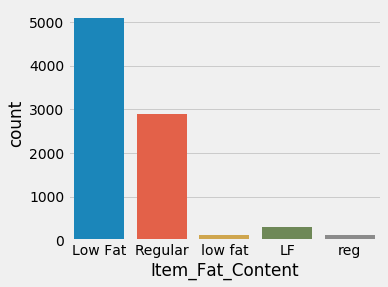

In [222]:
plt.rcParams['figure.figsize']=(5,4)
sns.countplot(train.Item_Fat_Content)

### 2.1.3.2. Distribution of the variable Item_Type
      Looking at the list of Item_Type we see there are sixteen different types. This is a high number of unique
      values for a categorical variable. Therefore we must try to think of a way to drastically reduce this number

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

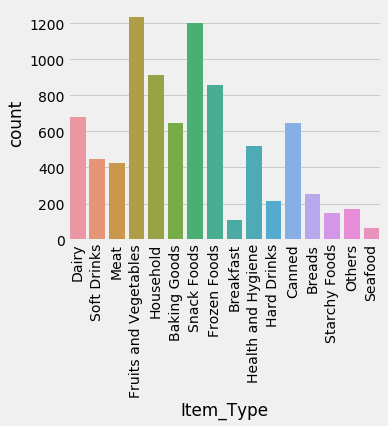

In [223]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

#### 2.1.3.3. Distribution of the variable Outlet_Size
      There seems to be a low number of stores with size equals to “High”. Most of the existent stores seem to be
      either “Small” or “Medium”. It will be interesting to  see how this variable relates to our target.
      If “High” size  stores have better results as  initially expected or due to this number distribution sales
      results might be  similar.

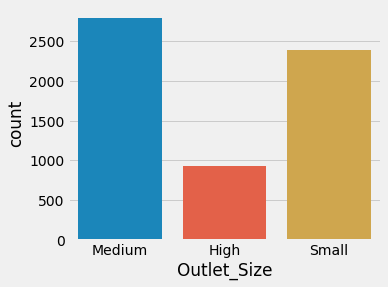

In [224]:
plt.rcParams['figure.figsize']=(5,4)
sns.countplot(train.Outlet_Size)

### 2.1.3.4. Distribution of the variable, Outlet_Type and Outlet_Establishment_Year  & Outlet_Location

    BigMart appears to be a supermarket brand that is more present in “Small” to “Medium” size cities than in 
    more densily populated locations
     
    It looks like Supermarket Type2 , Grocery Store and Supermarket Type3 all have low expression in this
    distribution.
     
     Maybe we can create a single category with all of the three. Nevertheless, before doing this we must see their
    impact in the Item_Outlet_Sales

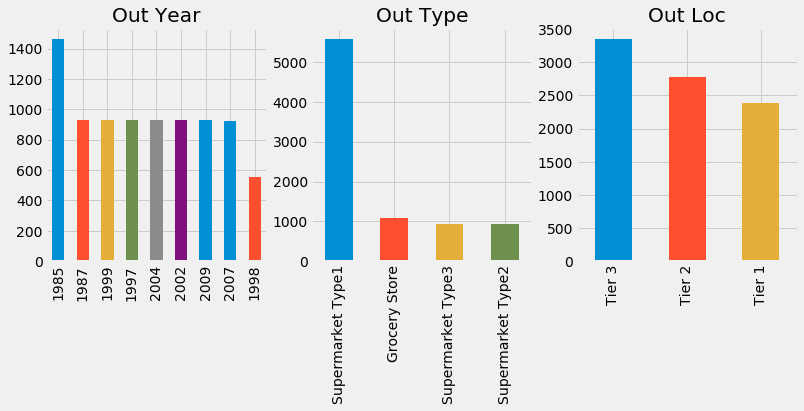

In [225]:
plt.figure(1)
plt.subplot(131)
train.Outlet_Establishment_Year.value_counts().plot(kind='bar',title='Out Year',figsize=(12,4))
plt.subplot(132)
train.Outlet_Type.value_counts().plot(kind='bar',title='Out Type')
plt.subplot(133)
train.Outlet_Location_Type.value_counts().plot(kind='bar',title='Out Loc')

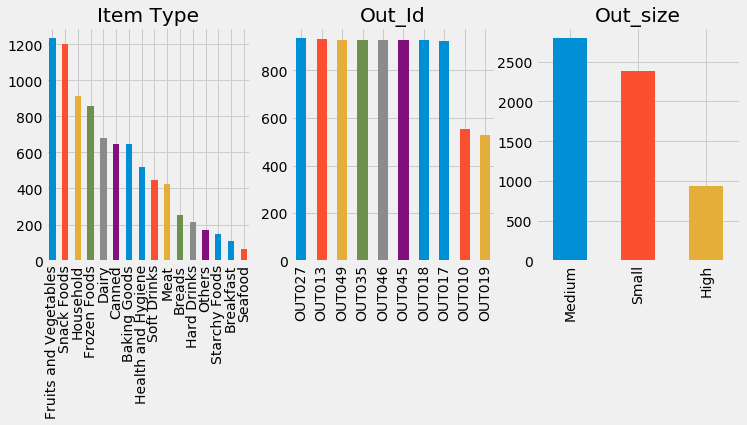

In [226]:
plt.figure(2)
plt.subplot(141)
train.Item_Type.value_counts().plot(kind='bar',title='Item Type',figsize=(15,4))
plt.subplot(142)
train.Outlet_Identifier.value_counts().plot(kind='bar',title='Out_Id')
plt.subplot(143)
train.Outlet_Size.value_counts().plot(kind='bar',title='Out_size')

### 2.2. Bivariate Analysis
    Firstly we individually analysed some of the existent features, now it is time to understand the relationship between our  target variable and predictors as well as the relationship among predictors.
    
#### 2.2.1. Numerical Variables

In [227]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

#### 2.2.1.1. Item_Weight and Item_Outlet_Sales analysis
    We saw previously that Item_Weight had a low correlation with our target variable. If we plot both features we can see that relationship.

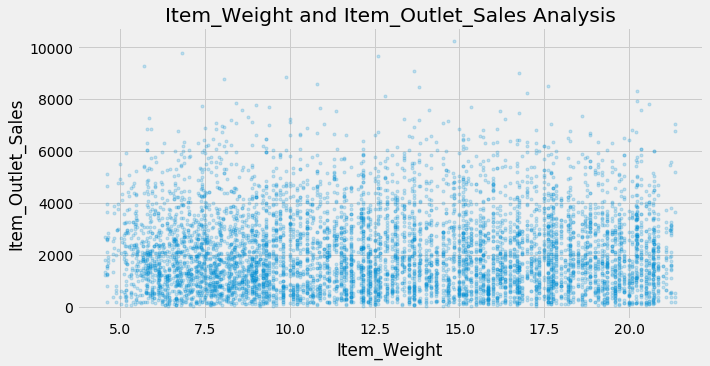

In [228]:
plt.figure(figsize=(10,5))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.2)

#### 2.2.1.2. Item_Visibility and Item_Outlet_Sales analysis
     Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will
     catch the eye of customer first rather than the ones in back.

     This was the assumption made… however, first the correlation and now this plot chart, 
     indicate that the more visible a product is the less higher its sales will be. This might
     be due to the fact that a great number of daily use products, which do not need high
     visibility, control the top of the sales chart. As we can see from the bar charts below,
     most sold products have lower visibility. Furthermore, there is a concerning number of 
     products with visibility zero.

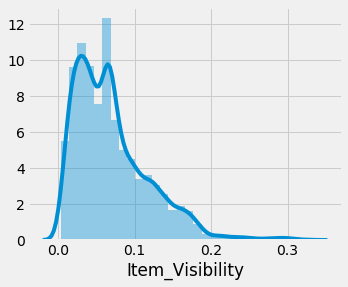

In [229]:
train.loc[train['Item_Visibility']==0.000000,'Item_Visibility']=np.mean(train['Item_Visibility'])
sns.distplot(train['Item_Visibility'],bins=30)
plt.show()

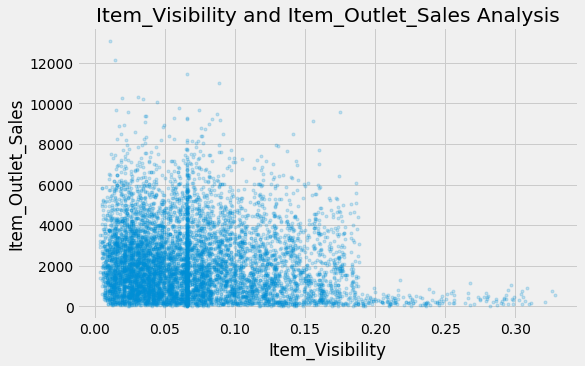

In [230]:
plt.figure(figsize=(8,5))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.2)

#### 2.2.1.3. Outlet_Establishment_Year and Item_Outlet_Sales analysis
      There seems to be no significant meaning between the year of store establishment and the sales for the items.
      1998 has low  values but thet might be due to  the fact the few stores opened in that year

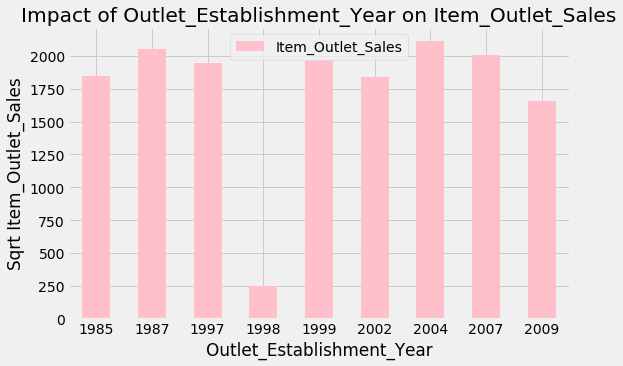

In [231]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='pink',figsize=(8,5))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### 2.2.1.4. Impact of Item_Type and Item_Outlet_Sales analysis

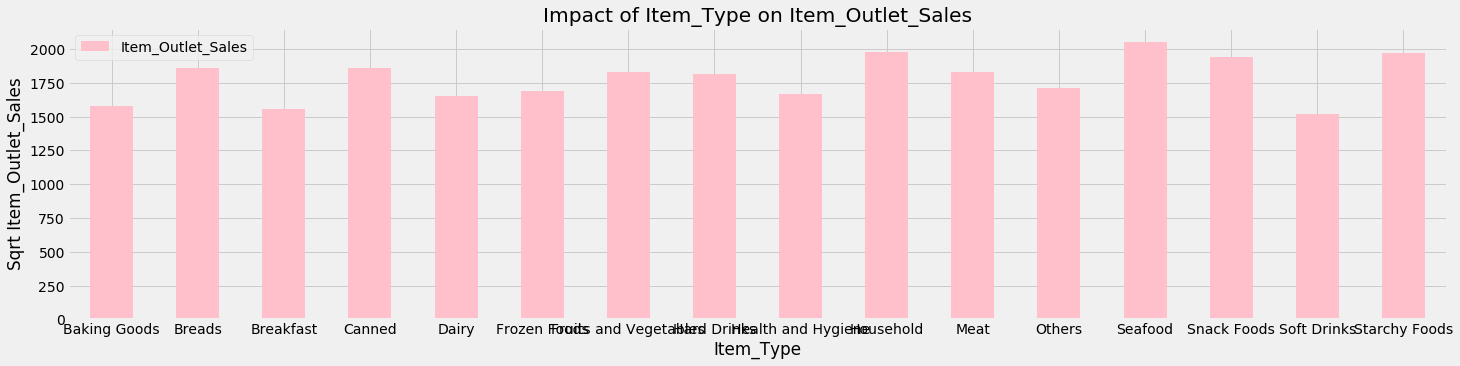

In [232]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='pink',figsize=(22,5))
plt.xlabel("Item_Type")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### 2.2.1.5. Impact of Item_Type and Item_Visiblity analysis

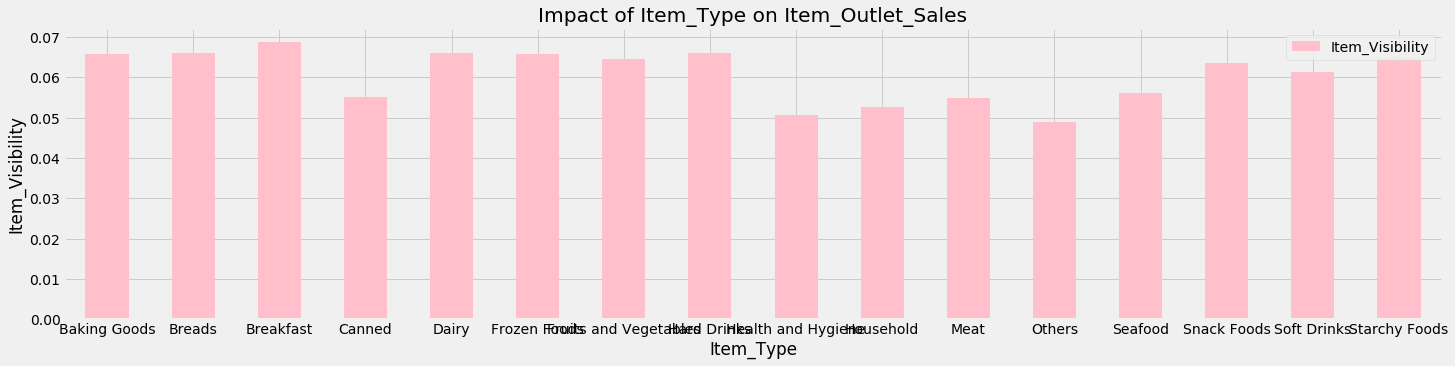

In [233]:
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='pink',figsize=(22,5))
plt.xlabel("Item_Type")
plt.ylabel("Item_Visibility")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### 2.2.1.6. Impact of Item_Type and Item_Outlet_Sales analysis

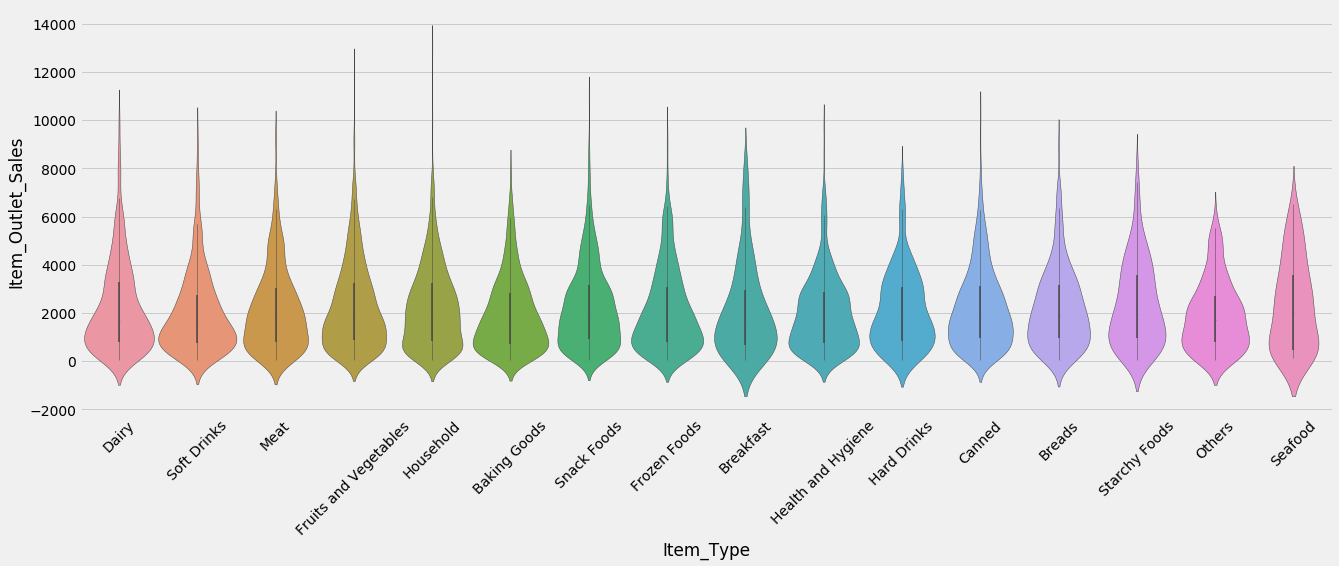

In [234]:
plt.rcParams['figure.figsize']=(20,7)
pl=sns.violinplot(x='Item_Type',y='Item_Outlet_Sales',data=train,linewidth=0.5,width=1)
_=pl.set_xticklabels(labels=train.Item_Type.unique(),rotation=45)

#### 2.2.1.7. Impact of Item_MRP, Item_Weight, and IItem_Visibility

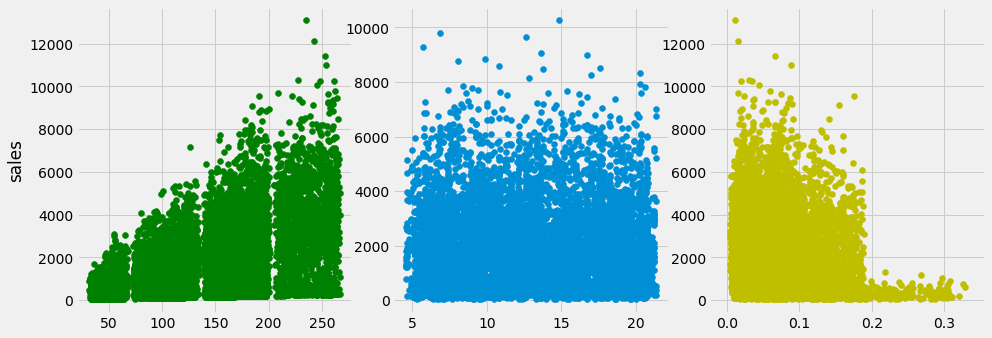

In [235]:
plt.rcParams['figure.figsize']=(14,5)

plt.subplot(131)
plt.ylabel('sales')
plt.scatter(train.Item_MRP,train.Item_Outlet_Sales,color='g')
plt.subplot(132)
plt.tight_layout()
plt.scatter(train.Item_Weight,train.Item_Outlet_Sales)
plt.subplot(133)
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales,color='y')


### 2.2.2. Categorical Variables
#### 2.2.2.1. Impact of Item_Fat_Content onItem_Outlet_Sales

      Daily use products should have a higher tendency to sell as compared to the specific use products.
      “Low Fat” products seem to have higher sales values than “Regular” products.

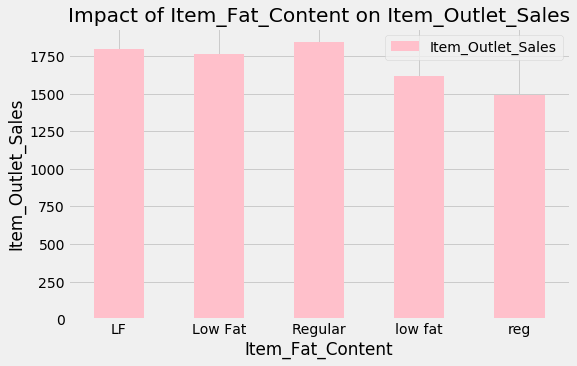

In [236]:
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='pink',figsize=(8,5))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

#### 2.2.2.2. Impact of Outlet_Identifier on Item_Outlet_Sales

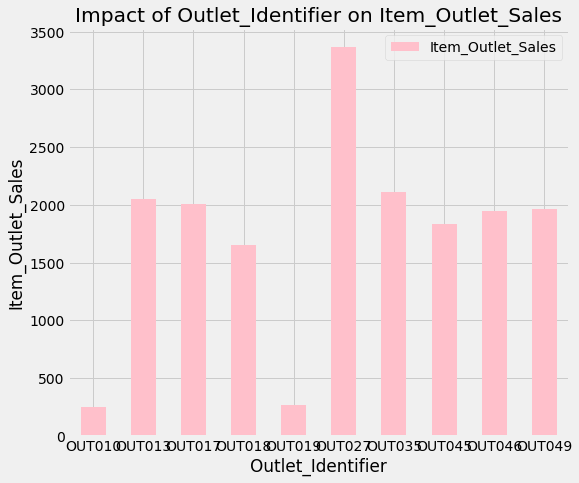

In [237]:
Outlet_Identifier_pivot = train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='pink',figsize=(8,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

      From the ten stores, two are Groceries whereas six are Supermarket Type1, one Supermarket Type2 and one 
      Supermarket Type3.You can get this information from the pivot_tables below.

      From the above bar chart, we see that thr groceries (“OUT010”, “OUT019”) have the lowest sales 
      results which is expected followed by the Supermarket Type 2 (“OUT018”). Curiously, most stores are of type 
      Supermarket Type1 of size “High” and do not have the best results. The best results belong to “Out027” 
      which is a “Medium” size Supermarket Type 3.

In [238]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [239]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


####2.2.2.3. Impact of Outlet_Size on Item_Outlet_Sale
    In the beginning, our belief was that stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place. According to the results, this is almost the case. Curiously, consumers tend to prefer medium size stores instead of big size. As we saw in the previous section, most stores have size “Medium” but still the “High” and “Small” stores which are clearly in an inferior number can beat or even come close to their numbers

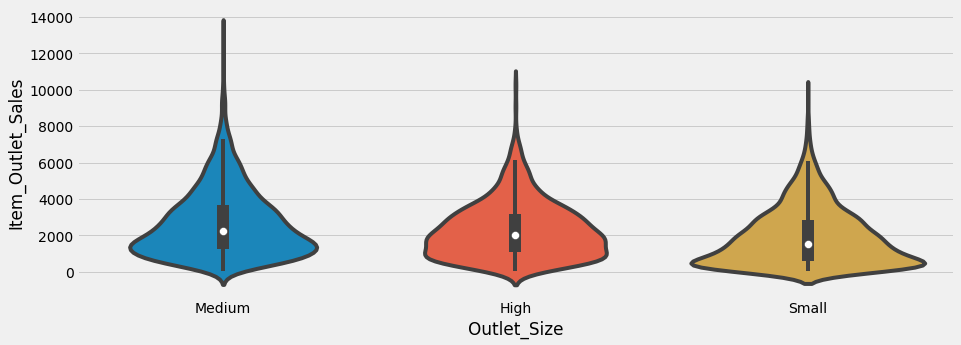

In [240]:
pl=sns.violinplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

#### 2.2.2.4. Impact of Outlet_Type on Item_Outlet_Sales
     From this analysis possibly it would be a good idea to creat a new feature that shows the sales ratio according
     to the store size


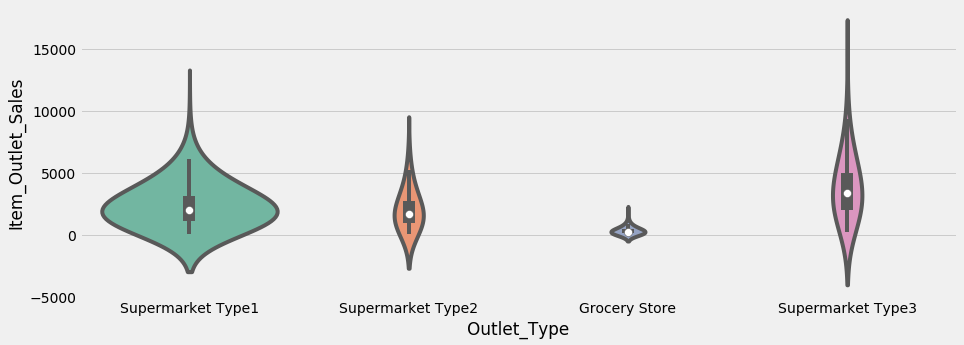

In [241]:
pl=sns.violinplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train,scale="count",palette="Set2",bw=1,dodge=False,height=4, aspect=.7)

#### 2.2.2.5. Impact of Outlet_Location_Type on Item_Outlet_Sales
       Do Tier 1 cities have higher sales? This was one of the premisses we made in the start of this study.However,
       if we look at our results we see that in fact it is tores from Tier 2 cities that present the highest results   
       followed by Tier 3 cities and with Tier 1 cities with the lowest results of the three type of locations

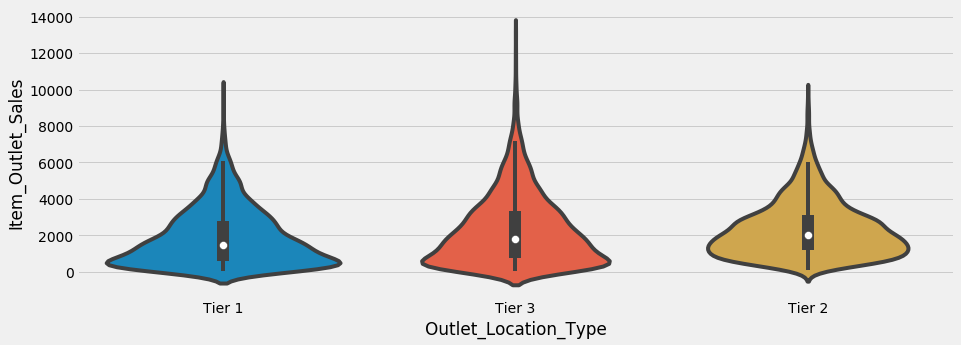

In [242]:
pl=sns.violinplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,)

In [243]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


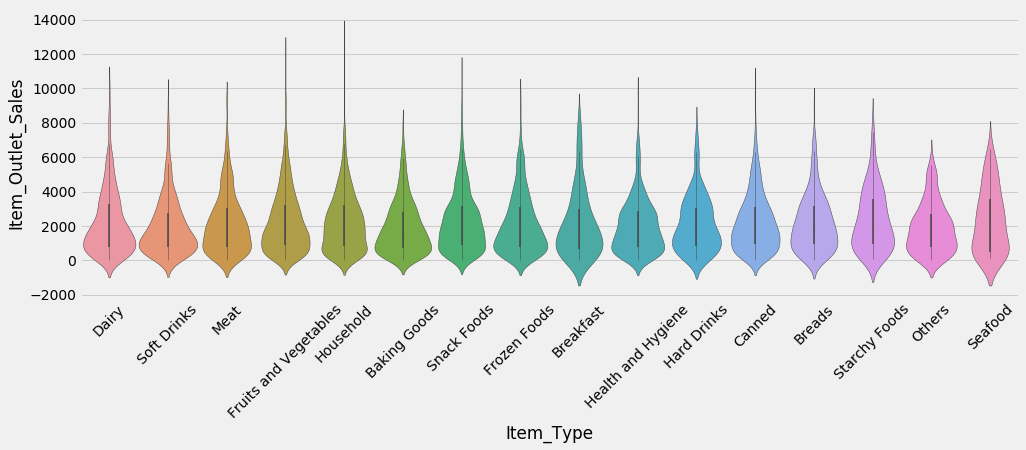

In [244]:
plt.rcParams['figure.figsize']=(15,5)
pl=sns.violinplot(x='Item_Type',y='Item_Outlet_Sales',data=train,linewidth=0.5,width=1)
_=pl.set_xticklabels(labels=train.Item_Type.unique(),rotation=45)


### 2.3 Data Pre-Processing

    Regarding the variables which were thought to have high impact on the product’s sale price. Item_Visibility does not have a high positive correlation as expected, quite the opposite. As well, there are no big variations in the sales due to theItem_Type.On the other hand, it was possible to see that the size, location and type of store could have a positive impact on sales
    
    If we look at variable Item_Identifer , we can see different groups of letters per each product such as ‘FD’ (Food), ‘DR’(Drinks) and ‘NC’ (Non-Consumable). From this we can create a new variable.

    Regarding Item_Visibility there are items with the value zero. This does not make lot of sense, since this is 
    indicating those items are not visible on the store.
    
    Similar, Item_Weight and Outlet_Size seem to present NaN values.

    There seems to be 1562 unique items only available in a single store.
    
    Item_Fat_Content has vale “low fat” writen in different manners.
    
    For Item_Type we try to create a new feature that does not have 16 unique values.
    
    Outlet_Establishment_Year besides being a hidden category, its values vary from 1985 to 2009 . It must be converted to how old the store is to better see the impact on sales
    
 #### 2.3.1. Looking for missing values
     Usually, datasets for every challenge such as those presented in Analytics Vidhya or Kaggle come seperated as a 
     train.csv and a test.csv. It is generally a good idea to combine both sets into one, in order to perform data 
    cleaning and feature engineering and later divide them again. With this step we do not have to go through the trouble  of repeting twice the same code, for both datasets. Let’ s combine them into a dataframe datawith a source column specifying where each observation belongs.

In [245]:
#Join Train and Test Dataset
#Create source column to later separate the data easily
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [246]:
#Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100 #show values in percentage

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  17.171219
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  28.273726
Outlet_Type                   0.000000
source                        0.000000
dtype: float64

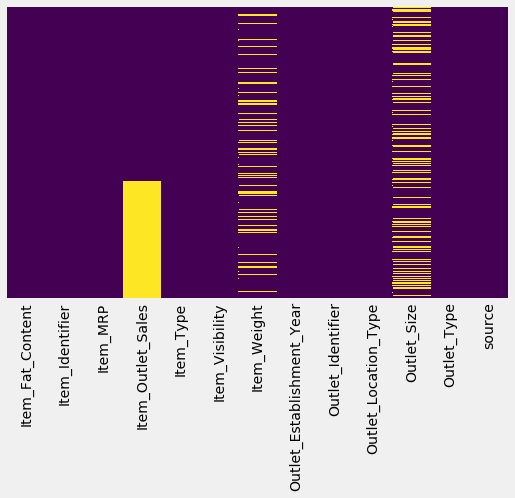

In [247]:
plt.rcParams['figure.figsize']=(8,5)
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)

    Note that the Item_Outlet_Salesis the target variable and 39% of its values are NaN. For this case only, the missing values are the ones which belong to the test set. Remember we added the train and test datasets. So we need not worry about it.
    we’ll impute the missing values in Item_Weight and Outlet_Size.
    
### 2.3.2.  Imputing Missing Values
     We’ve seen previously on the EDA section that the Item_Weight and the Outlet_Size had missing values. Hence,for now we will impute for this missing values the mean for each corresponding variable.
     
#### 2.3.2.1. Imputing the mean for Item_Weight missing value



In [248]:
#aggfunc is mean by default! Ignores NaN by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06         

In [249]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight
print('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


#### 2.3.2.2  Imputing Outlet_Size missing values with the mode

        For this example, we will apply the same logic. In this case, instead of using the default 
        codeaggfunc = mean() for the pivot_table()we will use the mode

In [250]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [251]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


## 3. Feature Engineering
    So we now got rid of all the missing values in our data that might negatively influence our analysis. If you remember, during our analysis we saw some nuances in the data and now is time to fix them and make our data ready for analysis.
### 3.1. Should we combine Outlet_Type?
      In our exploration we questioned “Is it viable to combine Supermarket Type 2 and Type 3?” Let’s check

In [252]:
#Creates pivot table with Outlet_Type and the mean of #Item_Outlet_Sales. Agg function is by default mean()
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


     As observed by the results below, the average product sales are significantly different so we leave as is.
     
 ### 3.2. Item_Visibility minimum value is 0
    In our data exploration we saw that Item_Visibility had the minimum value 0, which makes no sense since every product must be visible to all clients. Let’s consider it as missing value and impute it with mean visibility of that product.

In [253]:
group_combined = data.groupby(['Item_Visibility','Item_Identifier'])
group_combined_mean=group_combined.mean()
group_combined_mean=group_combined_mean.reset_index()[['Item_Visibility','Item_Identifier']]
group_combined_mean

#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)
print ('Number of 0 values initially: %d'%sum(miss_bool))

data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])

print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))
data.head(5)



Number of 0 values initially: 353
Number of 0 values after modification: 0


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.066132,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.066132,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


### 3.3. Determine the years of operation of a store
    We talked about using how long has been working instead of the date of start. Remember that the data we have is from 2013. Thus we must consider this year into our calculations-

In [254]:
#Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

### 3.4. Create a broad category of Item_Type
    Earlier we saw that the Item_Type variable has 16 categories which might not prove to be very useful in our analysis. So it’s a good idea to combine them. If we look closely to the Item_Identifier of each item we see that each one starts with either “FD” (Food), “DR” (Drinks) or “NC” (Non-Consumables). Therefore, we can group the items within these 3 categories

In [255]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',                                                      'NC':'Non-Consumable',                                                            'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

### 3.5. Modify categories of Item_Fat_Content
    We found typos and difference in representation in categories of Item_Fat_Content variable. This can be corrected as:


In [256]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())
print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',                                                      'reg':'Regular',
'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


    Now it makes more sense. But hang on, we also saw in section 3.4. there were some non-consumables as well and a fat-content 
    should not be specified for them. So we can also create a separate category for such kind of observations.

In [257]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()


Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

## 4. Feature Transformations
### 4.1 Categorical Variables — One Hot Encoding

    Since scikit-learn only accepts numerical variables, we need to convert all categories of nominal variables into numeric types. Let’s start with turning all categorical variables into numerical values using LabelEncoder() (Encode labels with value between 0 and n_classes-1). After that, we can use get_dummies to generate dummy variables from these numerical categorical variables

In [258]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [259]:
#Dummy Variables:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

### 4.2. Exporting Data 
    Final step is to convert data back into train and test data sets.Its generally a good idea to export both of
    these as modified data sets so that they can be re-used for multiple sessions. This can be achieved using  
    following code:

In [260]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
#train.head()
test = data.loc[data['source']=="test"]
test.head()
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)
#Export files as modified versions:
train.to_csv("/Users/vishal.bule/Desktop/test/train_modified.csv",index=False)
test.to_csv("/Users/vishal.bule/Desktop/test/test_modified.csv",index=False)

## 5. Model Building

    Since I’ll be making many models, instead of repeating the codes again and again, I would like to define a generic function which takes the algorithm and data as input and makes the model, performs cross-validation and generates submission.

In [261]:
train_df = pd.read_csv('/Users/vishal.bule/Desktop/test/train_modified.csv')
test_df = pd.read_csv('/Users/vishal.bule/Desktop/test/test_modified.csv')

In [270]:
train_df.shape[0]
test_df.shape[0]


5681

In [292]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Remember the target had been normalized
    #Sq_train = (dtrain[target])**2
    Sq_train = (dtrain[target])
#Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors],Sq_train , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.8g" % np.sqrt(metrics.mean_squared_error(Sq_train.values, dtrain_predictions)))
    print("CV Score : Mean - %.8g | Std - %.8g | Min - %.8g | Max - %.8g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

### 5.1. Linear Regression Model

In [293]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, '/Users/vishal.bule/Desktop/Train/LR.csv')


Model Report
RMSE : 1127.4297
CV Score : Mean - 1128.8583 | Std - 43.468698 | Min - 1074.7433 | Max - 1209.6554


### 5.2. Ridge Regression Model

In [294]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, '/Users/vishal.bule/Desktop/Train/RR.csv')


Model Report
RMSE : 1128.4847
CV Score : Mean - 1129.6766 | Std - 44.662336 | Min - 1075.5548 | Max - 1217.0342


### 5.3. Decision Tree Model

In [295]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, '/Users/vishal.bule/Desktop/Train/DT.csv')


Model Report
RMSE : 1059.4533
CV Score : Mean - 1091.5087 | Std - 45.359908 | Min - 1014.3364 | Max - 1180.7895


### 5.4. Random Forrest Model

In [296]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, '/Users/vishal.bule/Desktop/Train/RF.csv')


Model Report
RMSE : 1069.2059
CV Score : Mean - 1098.1468 | Std - 43.686277 | Min - 1028.3145 | Max - 1182.831


### 5.5. XGBoost Model

In [297]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=True)

[0]	validation_0-rmse:2430.78
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:2315.07
[2]	validation_0-rmse:2204.79
[3]	validation_0-rmse:2100.7
[4]	validation_0-rmse:2000.82
[5]	validation_0-rmse:1905.77
[6]	validation_0-rmse:1816.11
[7]	validation_0-rmse:1730.5
[8]	validation_0-rmse:1649.38
[9]	validation_0-rmse:1572.28
[10]	validation_0-rmse:1499.11
[11]	validation_0-rmse:1428.82
[12]	validation_0-rmse:1362.7
[13]	validation_0-rmse:1298.87
[14]	validation_0-rmse:1239.13
[15]	validation_0-rmse:1182.18
[16]	validation_0-rmse:1127.2
[17]	validation_0-rmse:1076.23
[18]	validation_0-rmse:1026.67
[19]	validation_0-rmse:980.791
[20]	validation_0-rmse:935.914
[21]	validation_0-rmse:893.943
[22]	validation_0-rmse:853.677
[23]	validation_0-rmse:815.8
[24]	validation_0-rmse:780.072
[25]	validation_0-rmse:745.895
[26]	validation_0-rmse:713.714
[27]	validation_0-rmse:682.742
[28]	validation_0-rmse:653.307
[29]	validation_0-rmse:625.035
[30]	validation_0-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [299]:
#Predict training set:
train_df_predictions = my_model.predict(train_df[predictors])
#make predictions
predictions = my_model.predict(test_df[predictors])
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.8g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))
IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("merda.csv", index=False)

Mean Absolute Error : 130.07950375377385
RMSE : 1054.8446
